                                   Autor: Lucas de Sousa Brito
                                   Junho de 2021

In [28]:
%%HTML 
<!--
    EXECUTE THIS CELL TO FORMAT THE NOTEBOOK
-->
<style> 
    
    body.jp-Notebook { max-width: 700pt; margin-left: auto; margin-right: auto; border-left: 1pt solid gray; border-right: 1pt solid gray; }          
    h1 { margin-top: 20pt!IMPORTANT; }
    h2 { margin-top: 20pt!IMPORTANT; }
    h3 { margin-top: 10pt!IMPORTANT; }
    h4 { margin-top: 10pt!IMPORTANT; }
    .code_cell .output_subarea, .jp-CodeCell .jp-OutputArea-output { border: 1pt solid #a0a0a0!IMPORTANT; }    
    div.output_area img, .jp-OutputArea-output img { max-width: unset; }
    div.output_area, .jp-OutputArea-output { max-height: 300pt; overflow: auto; }
</style>

<script>
    
                                                                    
    function luc7213_hide( link ) {
        var cell = link.luc7213_cell;        
        cell.style.visibility = 'hidden'
        cell.style.height = '1px';            
        cell.style.overflow = 'hidden'
        link.innerHTML = link.innerHTML = "[show "+link.luc7213_cell_type+"]";
    }                           
    function luc7213_show( link ) {
        var cell = link.luc7213_cell;        
        cell.style.visibility = 'visible';
        cell.style.height = '';
        link.innerHTML = link.innerHTML = "[hide "+link.luc7213_cell_type+"]";        
    }                                                               
    function luc7213_toggle( link ) {
        var cell = link.luc7213_cell;
        if( cell.style.visibility != 'hidden' ) {            
            luc7213_hide( link );
        }
        else {
            luc7213_show( link );
        }        
    }
    
    function luc7213_enhance( cell ) {        
        var tags = cell.className.split( " " );   
        var tags2 = cell.querySelectorAll('.cell-tag');
        for( const el of tags2 ) { tags[tags.length] = el.innerText; }
    
        var div = cell.querySelector(".luc7213_div" );
        if( !div ) {            
            console.debug( 'found new cell' );
            div = document.createElement('DIV');
            div.style.textAlign = 'right';            
            div.className = 'luc7213_div';
            cell.insertBefore( div, cell.firstChild );                                
        }
        
        var showcode = tags.includes( 'showcode' ) || tags.includes( 'celltag_showcode' );
        var code = cell.querySelector('.input, .jp-Cell-inputWrapper' );                    
        var codeLink = div.querySelector( '.luc7123_code' );
        if( !codeLink ) {
            console.debug( 'add show/hide link for code' );
            codeLink = document.createElement('A');
            div.appendChild( codeLink );
            codeLink.className = 'luc7123_code';
            codeLink.setAttribute( 'onclick', "luc7213_toggle(this); return false;" );
            codeLink.luc7213_cell = code;
            codeLink.luc7213_cell_type = "code";            
            if( showcode ) {
                luc7213_show(codeLink);                
            } else {
                luc7213_hide(codeLink);                                
            }
        }   
        
        var hideoutput = tags.includes( 'hideoutput' ) || tags.includes( 'celltag_hideoutput' )
        var output = cell.querySelector('.output, .jp-OutputArea' );                            
        if( output ) {
            var outLink = div.querySelector('.luc7123_output');
            if( !outLink ) {
                console.debug( 'add show/hide link for output' );
                outLink = document.createElement('A');
                div.appendChild( outLink );
                outLink.className = 'luc7123_output';
                outLink.setAttribute( 'onclick', 'luc7213_toggle(this); return false;' );
                outLink.luc7213_cell = output;
                outLink.luc7213_cell_type = "output";
                outLink.innerHTML = '[hide output]';  
                if( hideoutput ) {
                    luc7213_hide(outLink);                
                } else {
                    luc7213_show(outLink);                
                }
            }
        }
    }                                                                
    
    var luc7213_started = false;
    
    function luc7213_main() {   
        if( !luc7213_started ) {
            var s = document.querySelector( '#site' );
            if( s ) s.scrollTo(0,0);
            luc7213_started=true;
        }
        
        var lsCells = document.querySelectorAll('.jp-CodeCell, .code_cell' );
        for( var i = 0; i < lsCells.length; i++ ) {
            var cell = lsCells[i];
            luc7213_enhance( cell );
        }    
        var lsTitles = document.querySelectorAll( 'h2, h3, h4' );
        var counter = [0,0,0]
        for( var i = 0; i < lsTitles.length; i++ ) {
            var title = lsTitles[i];
            var number = title.querySelector('.luc7213');
            if( !number ) {
                number = document.createElement('SPAN');
                title.insertBefore( number, title.firstChild );
                number.className='luc7213';                
            }            
            if( title.tagName == 'H2') { 
                counter[0]++; counter[1]=0; counter[2]=0; 
                number.innerHTML = counter[0] + ". ";
            }
            if( title.tagName == 'H3') { 
                counter[1]++; counter[2]=0; 
                number.innerHTML = counter[0] + "." + counter[1] + ". ";
            }
            if( title.tagName == 'H4') { 
                counter[2]++; 
                number.innerHTML = counter[0] + "." + counter[1] + "." + counter[2] + ". ";
            }
        }        
        
        setTimeout( luc7213_main, 1000 )
    }
    
    luc7213_main()
    
</script>


# Estudos em uma base pública de fraudes de cartão de crédito

## Introdução

Neste notebook foi efetuado o treinamento de um modelo para identificação de fraude em uma base pública de fraudes de cartões de crédito na qual foi possível identificar cerca de 75% das transações fraudulentas com mais de 95% de acerto em relação as transações alertadas.

A base utilizada foi baixada de https://www.kaggle.com/mlg-ulb/creditcardfraud e seus autores declaram que corresponde a dois dias de dados reais de movimento de uma instituição financeira europeia em 2013 anonimizados. 

Esse é um conjunto de dados bem popular na ciência de dados, mas não há muita informação sobre sua origem e não há como validar que se tratam de dados reais. Os dados foram anonimizados via PCA e isto torna difícil entender o que parte dos atributos significam. 

Este é um problema relevante para grandes bancos pois identificar rapidamente estas ocorrências permite adotar medidas preventivas como solicitar validações de segurança extras, negar as transações suspeitas (se o acerto do modelo for suficiente) e/ou análise humana e bloqueios. 

Foi escolhido o modelo de "floresta" que, em essência, é um conjunto de várias árvores de decisão. Árvores são modelos interessantes pois permitem entender as associações que foram efetuadas pelo modelo e correlaciona-las com as características dos eventos de interesse.

## Carga dos dados

Foram efetuados pré-processamentos iniciais:
* foi adicionado atributos de data e hora em formato mais humano para facilitar o entendimento dos dados
* foram adicionadas atributos de valor por faixa

In [119]:
def bloco():

    import pandas as pd
    import sklearn
    
    global df
    global df_len

    df = pd.read_csv('data/creditcard.csv')

    df_len = len(df)
    
    df = df.rename(columns={'Time':'dt'})
    df = df.rename(columns={'Amount':'vr'})

    df.insert( 1, 'dt_hora', df['dt'].apply( lambda x: int(x%(24*60*60)/(60*60) ) ) )
    df.insert( 2, 'dt_wday', ( df['dt'].apply( lambda x: int(x/(24*60*60)%7) ) ) ) 
    df['dt'] = df['dt'].apply( lambda x: int(x/(24*60*60)) )
    df = df.rename(columns={'dt':'dt_dia'})
        
    df['vr1'] = df['vr'].apply( lambda x: 1 if x < 10 else 0 )
    df['vr2'] = df['vr'].apply( lambda x: 1 if 10 < x < 20 else 0 )
    df['vr3'] = df['vr'].apply( lambda x: 1 if 20 < x < 50 else 0 )
    df['vr4'] = df['vr'].apply( lambda x: 1 if 50 < x < 100 else 0 )
    df['vr5'] = df['vr'].apply( lambda x: 1 if 100 < x < 200 else 0 )
    df['vr6'] = df['vr'].apply( lambda x: 1 if 200 < x < 500 else 0 )
    df['vr7'] = df['vr'].apply( lambda x: 1 if 500 < x < 1000 else 0 )
    df['vr8'] = df['vr'].apply( lambda x: 1 if 1000 < x < 1500 else 0 )
    df['vr9'] = df['vr'].apply( lambda x: 1 if 1500 < x < 2000 else 0 )
    df['vr10'] = df['vr'].apply( lambda x: 1 if 2000 < x < 2500 else 0 )
    df['vr11'] = df['vr'].apply( lambda x: 1 if 2500 < x < 5000 else 0 )
    df['vr12'] = df['vr'].apply( lambda x: 1 if 5000 < x else 0 )

    assert df_len==len(df), "Ooops, o tamanho do conjunto de entrada (df) foi alterado"
    
    print( 'OK, dados carregados.')
  
bloco()

def bloco():
    
    import pandas as pd
    pd.options.display.max_columns = None
    
    u = df.describe(include='all').transpose()
    
    u['Tipos'] = df.dtypes
    u['Val.Distintos'] = df.nunique()    
    u['%distintos'] = df.nunique() / len(df) * 100.0
    
    return u.transpose()

bloco()

OK, dados carregados.


,dt_dia,dt_hora,dt_wday,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,vr,Class,vr1,vr2,vr3,vr4,vr5,vr6,vr7,vr8,vr9,vr10,vr11,vr12
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,0.491635,14.04647,0.491635,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.349619,0.001727,0.341684,0.129435,0.177573,0.127725,0.095479,0.067923,0.021323,0.005583,0.002258,0.000797,0.001352,0.000193
std,0.499931,5.835854,0.499931,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.08885,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.62446,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527,0.474275,0.335681,0.382153,0.333784,0.293876,0.251614,0.14446,0.074509,0.047461,0.028221,0.036742,0.013895
min,0.0,0.0,0.0,-56.40751,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.49772,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,10.0,0.0,-0.920373,-0.59855,-0.890365,-0.84864,-0.691597,-0.768296,-0.554076,-0.20863,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.49885,-0.456299,-0.211721,-0.228395,-0.54235,-0.161846,-0.354586,-0.317145,-0.326984,-0.07084,-0.05296,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,15.0,0.0,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.02945,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,19.0,1.0,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.49315,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.07828,77.165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,23.0,1.0,2.45493,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.50309,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Tipos,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
Val.Distintos,2,24,2,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,32767,2,2,2,2,2,2,2,2,2,2,2,2,2


### Visão geral dos dados

Infelizmente os dados foram anonimzados por meio da aplicação de um PCA, desta forma não é possível compreender o que os atributos V1 a V28 realmente significam. 

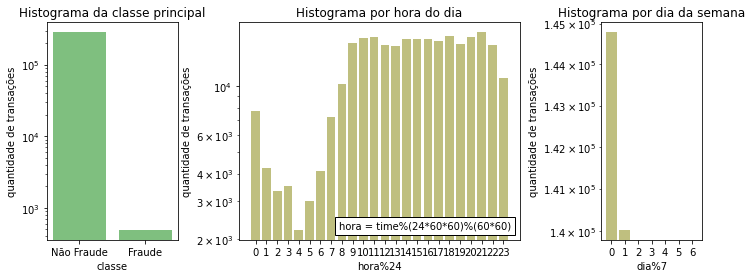

In [43]:
#start_hidden
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def bloco():

    fig = plt.figure(figsize=(13,4))
    fig_grid = fig.add_gridspec(100,360)

    ax = fig.add_subplot( fig_grid[ 0:100, 15:80 ] )
    ax.set( title="Histograma da classe principal", 
            xlabel="classe", xticks=[0,1], xticklabels=['Não Fraude', 'Fraude'],
            ylabel="quantidade de transações",  yscale="log" )
    ax.hist( df['Class'] , [x for i in range(2) for x in (i-0.4,i+0.4)], color='#00800080')
    
    ax_cols = [x for x in range(0,24)]
    ax = fig.add_subplot( fig_grid[ 0:100, 110:250 ] )
    ax.set( title="Histograma por hora do dia",
            xlabel='hora%24', xticks=ax_cols, xticklabels=ax_cols, 
            ylabel='quantidade de transações', yscale='log' )
    ax.hist( df['dt_hora'] , [x for i in ax_cols for x in (i-0.4,i+0.4)], color='#80800080')
    ax.add_artist(matplotlib.offsetbox.AnchoredText("hora = time%(24*60*60)%(60*60)", frameon=True, loc='lower right'))
    
    ax_cols = [x for x in range(0,7)]
    ax = fig.add_subplot( fig_grid[ 0:100, 290:340 ] )
    ax.set( title="Histograma por dia da semana",
            xlabel='dia%7', xticks=ax_cols, xticklabels=ax_cols,
            ylabel='quantidade de transações', yscale='log')
    ax.hist( df['dt_wday'] , [x for i in ax_cols for x in (i-0.4,i+0.4)], color='#80800080')
    
    plt.show()

bloco()

### Padroniza e gera os conjuntos de treino, validação e teste

Foram criados os seguintes conjuntos de dados
* X_train / y_train com 64% dos dados. Este conjunto será usado para o treinamento do modelo.
* X_validation / y_validation com 16% dos dados. Este conjunto será usado para a validação do modelo.
* X_test / y_test com 20% dos dados. Este conjunto será usado para o teste final do modelo.

Como o conjunto de dados é desbalanceado, para compensar os dados da classe 1 (fraude) foram duplicados no conjunto de dados de treinamento para garantir um bom treinamento da rede neural.

Neste notebook não foi utilizado o conjunto "validation", mas mantivemos a separação desta forma para poder comparar com outros notebooks que usam outras tipos de modelos.

In [120]:
def bloco():
    
    global X_train, X_test, X_validation
    global y_train, y_test, y_validation    
    
    from sklearn.model_selection import train_test_split
            
    # separa conjunto de treinamento e testes
    X_train, X_test = train_test_split(df, test_size=0.2, stratify=df['Class'])
    
    # separa conjunto de validação
    X_train, X_validation = train_test_split(X_train, test_size=0.2, stratify=X_train['Class'])
   
    # balanceia as amostras    
    X_train_fraude = X_train[ X_train['Class'] == 1 ]
    X_train_naofraude = X_train[ X_train['Class'] == 0 ]
    
    for i in range( int( len(X_train_naofraude)/len(X_train_fraude) ) ):
        X_train = X_train.append( X_train_fraude )
    
    X_train = X_train.sample(frac=1).reset_index(drop=True)    
       
    # separa y das amostras
    y_train = X_train.pop( 'Class' )
    y_test = X_test.pop( 'Class' )
    y_validation = X_validation.pop( 'Class')
        
    print(f'Training shape: {X_train.shape} {y_train.shape}' )
    print(f'Validation shape: {X_validation.shape} {y_validation.shape}' )
    print(f'Test shape: {X_test.shape} {y_test.shape}' )
         
bloco()

Training shape: (364031, 44) (364031,)
Validation shape: (45569, 44) (45569,)
Test shape: (56962, 44) (56962,)


## Cria o modelo

Monta um modelo simples de rede neural multicamada para a predição dos valores. 

### Estrutura e compila

O modelo escolhido foi uma "floresta aleatória" que, basicamente, corresponde a um conjunto de árvores de decisão em que vale a recomedação da maioria das árvores.

Foram testadas configurações com:
* 100 árvores
* 150 árvores
* 15 árvores 
* 100 árvores + limite de produndidade=5
* 150 árvores + limite de produndidade=5

A quantidade de árvores afetou pouco o resultado, mas a limitação de profundidade comprometeu os resultados. Para este conjunto de dados em particular parece que deixar a profundidade livre é melhor. 

In [121]:
#start_hidden

def bloco():
    
    from sklearn.ensemble import RandomForestClassifier
    
    global model
    
    model = RandomForestClassifier(
        #random_state=0,
        n_estimators=15, # qtd árvores
        #max_depth=5,    # máximo nível de subdivisões das árvores
    )
        
    print( 'OK, modelo configurado.' )
       
bloco()

OK, modelo configurado.


In [129]:
def bloco():
    
    global history
        
    model.fit(X_train, y_train)
    
    print( 'OK, modelo treinado.')
       
bloco()

OK, modelo treinado.


## Resultados Alcançados

O histórico abaixo apresenta as variáveis de acompanhamento calculadas com base no conjunto de dados separado para testes. 

In [130]:
def bloco():
    
    global y_pred
    
    # Predict the values from the validation dataset
    y_pred = model.predict(X_test)
    
    print( 'OK, conjunto de testes pontuado.' )
    
bloco()

OK, conjunto de testes pontuado.


 Acurácia=1.00
   Recall=0.74
  f Score=0.85
Taxa de falsos positivos=05.2%
Taxa de falsos negativos=25.5%


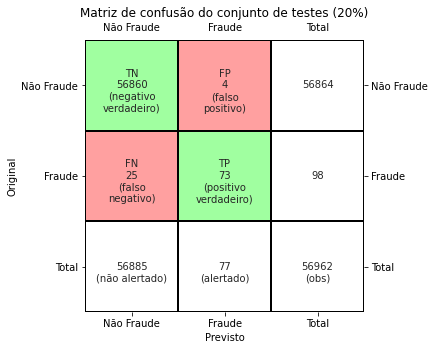

In [196]:
def bloco():
    
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    #from sklearn.metrics import roc_curve
    import seaborn as sns
    import pandas as pd
    
    class_names = ['Não Fraude','Fraude']
        
    confusion_mtx = pd.DataFrame( 
        columns=['Não Fraude','Fraude'],        
        data=confusion_matrix( y_test, y_pred )
    )    
    confusion_mtx['Total'] = confusion_mtx['Fraude'] + confusion_mtx['Não Fraude']
    confusion_mtx = confusion_mtx.append(confusion_mtx.sum(numeric_only=True), ignore_index=True)
    confusion_mtx = confusion_mtx.rename( index={ 0:'Não Fraude', 1:'Fraude', 2:'Total' } )
    
    fig = plt.figure(figsize=(5,5))    

    c = sns.heatmap([[2,1,0],[1,2,0],[0,0,0]], 
                    annot=[
                        ['\nTN\n\n(negativo\nverdadeiro)','\nFP\n\n(falso\npositivo)',''],
                        ['\nFN\n\n(falso\nnegativo)','\nTP\n\n(positivo\nverdadeiro)',''],
                        ['\n\n(não alertado)','\n\n(alertado)','\n\n(obs)']], 
                    cbar=False, 
                    fmt='',
                    linewidths=2,
                    linecolor='#000000',
                    cmap=matplotlib.colors.ListedColormap(['#ffffff','#FFa0a0','#a0FFa0'])
                   )
    c = sns.heatmap(confusion_mtx,                     
                    annot=True, 
                    fmt='g', 
                    cbar=False, 
                    cmap=matplotlib.colors.ListedColormap(['#ffffff00']),
                    linewidths=2,                    
                    linecolor='#000000'
                   )
    
    c.set(xlabel='Previsto',ylabel='Original')
    c.set(title='Matriz de confusão do conjunto de testes (20%)')
    c.tick_params(right=True, bottom=True, labelright=True, labeltop=True,rotation=0)


    fp = confusion_mtx.iloc[0,1] 
    fn = confusion_mtx.iloc[1,0]
    tn = confusion_mtx.iloc[0,0]
    tp = confusion_mtx.iloc[1,1] 
    
    acc       = (tp+tn)/(tp+tn+fp+fn)
    recall    = tp/(tp+fn)
    f1        = (2*acc*recall)/(acc+recall)
    
    fpp  = fp/(fp+tp)
    fnp  = fn/(fn+tp)
    
    print( f' Acurácia={acc:04.2f}' )
    print( f'   Recall={recall:04.2f}' )
    print( f'  f Score={f1:04.2f}' )
    print( f'Taxa de falsos positivos={fpp*100.0:04.1f}%' )
    print( f'Taxa de falsos negativos={fnp*100.0:04.1f}%' )
       
    plt.show()
    
bloco()

Nesta visualização:
* a diagonal em verde contem a quantidade de acertos do modelo;
* a diagonal em vermelho contem a quantidade de erros do modelo.




### Considerações quanto aos indicadores

Neste tipo de problema, o objetivo é encontrar a classe=1 (fraude) com o mínimo de perdas (falsos negativos) e com o mínimo de trabalho para revalidar os casos (falsos positivos). Desta forma o melhor conjunto de indicadores para este tipo de problema nos parece ser:

* **Minimizar Taxa de falsos negativos** (minimizar a quantidade de fraudes que não é apontada pelo modelo); 
* **Minimizar Taxa de falsos positivos** (minimizar a quantidade de casos que precisam ser revalidados).

O acurácia conta os acertos da classe=0 (não fraude) que são muito mais numerosos (pois o dataset é desbalanceado) e permite a geração de índices próximos a 100% mesmo quando o modelo é ruim. Em um experimento mental, fazendo um modelo que aponte tudo como classe=0 alcançará uma acurácia de 99,8% neste caso. O Recall é basicamente 100%-[taxa de falsos positivos], portanto mensura a mesma coisa apenas apenas com uma apresentação diferente. O F-Score é apenas uma média harmonica da acurácia e do recall, portanto herda o mesmo tipo de distorção que observamos na acurácia para esta categoria de problemas.

Referência a nomenclatura:
* https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
* https://en.wikipedia.org/wiki/Confusion_matrix

### Visualização das árvores

O modelo de floresta gera diversas árvores de decisão, abaixo segue o exemplo de uma das árvores geradas. No mesmo diretório onde se encontra este notebook foram exportadas imagens referentes as duas primeiras árvores. 

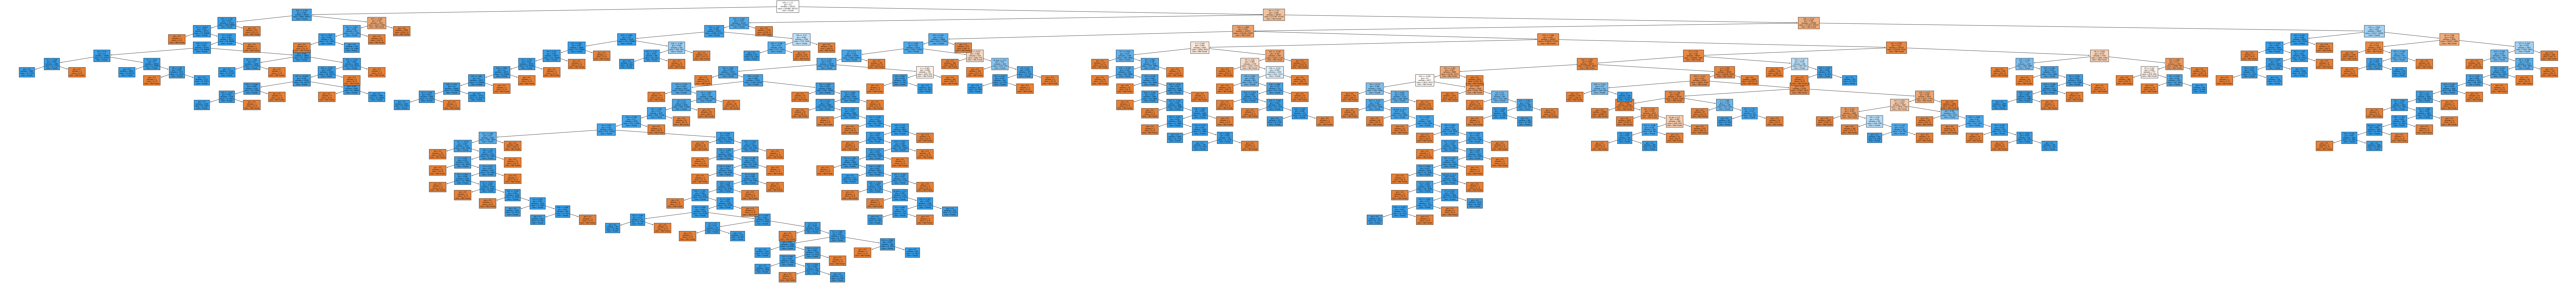

OK, os arquivos com a visualização das duas primeiras árvores foram gerados


In [77]:
def bloco():
    from sklearn import tree
    import matplotlib.pyplot as plt
    
    plt.ioff()
    
    fn=list(X_test.columns)
    cn=['Não Fraude','Fraude']
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (180,20), dpi=96)
    tree.plot_tree(model.estimators_[0],
                   feature_names=fn, 
                   class_names=cn,
                   fontsize=6,
                   filled = True);
    plt.savefig("creditcard_fraud_sklearn@tree1.png")
    plt.show()
            
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (180,20), dpi=96)
    tree.plot_tree(model.estimators_[1],
                   feature_names=fn, 
                   class_names=cn,
                   fontsize=6,
                   filled = True);
    plt.savefig("creditcard_fraud_sklearn@tree2.png")
    plt.close(fig)
    
    print('OK, os arquivos com a visualização das duas primeiras árvores foram gerados')
    
bloco()

## Considerações Finais

O resultado alcançado foi muito bom. Este notebook foi executado 5 vezes e a Taxa de falsos negativos ficou abaixo próxima de 5% e a Taxa de falsos positivos ficou próxima de 25%.  Como a precisão foi muito alta e, inicialmente, suspeitamos que houvesse overfit, mas rodei 5 vezes o modelo (sorteando aleatoriamente o modelo e dataset de teste) e os resultados variaram muito pouco. 

Este resultado significa que 75% da fraude registrada no dataset é encontrada, sendo que apenas 5% do que é apontado pelo modelo como fraude está incorreto. 

Os próximos passos para melhorar este modelo investigar:
* aplicar o kfold para validação cruzada;
* aplicar um grid search para verificar a influência dos hiperparametros na performace;
* aplicar o SMOTE para o ampliar o conjunto de treinamento;
* pontuar o conjunto de dados completo, extrair os falsos negativos e estudar modelos para identificar os 25% dos casos que passaram pelo modelo. 



